In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import sklearn

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('loan_prediction.csv')
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicant income,coapplicant income,loan amount,term,credit_history,propety area,loan status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df['loan status'].value_counts()

loan status
Y    422
N    192
Name: count, dtype: int64

In [5]:
df.shape

(614, 13)

**Exploratory Data Analysis**

In [6]:
df.describe()

,applicant income,coapplicant income,loan amount,term,credit_history
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


So we can see that there is skewness in applicant income and co applicant income and loan amount 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             614 non-null    object 
 1   gender              601 non-null    object 
 2   married             611 non-null    object 
 3   dependents          599 non-null    object 
 4   education           614 non-null    object 
 5   self_employed       582 non-null    object 
 6   applicant income    614 non-null    int64  
 7   coapplicant income  614 non-null    float64
 8   loan amount         592 non-null    float64
 9   term                600 non-null    float64
 10  credit_history      564 non-null    float64
 11  propety area        614 non-null    object 
 12  loan status         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.drop("loan_id",axis=1,inplace=True)

***Check for duplicates***

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape 

(614, 12)

There is no change in shape so there are no duplicates

***Check for null values***

In [11]:
df.isnull().sum()

gender                13
married                3
dependents            15
education              0
self_employed         32
applicant income       0
coapplicant income     0
loan amount           22
term                  14
credit_history        50
propety area           0
loan status            0
dtype: int64

In [12]:
print(df['gender'].mode())
print(df['married'].mode())
print(df['self_employed'].mode())


0    Male
Name: gender, dtype: object
0    Yes
Name: married, dtype: object
0    No
Name: self_employed, dtype: object


In [13]:
df['gender'].fillna("Male",inplace=True)
df['married'].fillna("Yes",inplace=True)
df['self_employed'].fillna("No",inplace=True)
df['dependents'].fillna("0",inplace=True)

In [14]:
df['loan amount'].fillna(df['loan amount'].median(),inplace=True)# as there is skewness in that data ..it is replace with median

In [15]:
df['credit_history'].fillna(df['credit_history'].median(),inplace=True)
df['term'].fillna(df['term'].median(),inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              614 non-null    object 
 1   married             614 non-null    object 
 2   dependents          614 non-null    object 
 3   education           614 non-null    object 
 4   self_employed       614 non-null    object 
 5   applicant income    614 non-null    int64  
 6   coapplicant income  614 non-null    float64
 7   loan amount         614 non-null    float64
 8   term                614 non-null    float64
 9   credit_history      614 non-null    float64
 10  propety area        614 non-null    object 
 11  loan status         614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [17]:
df.isnull().sum()

gender                0
married               0
dependents            0
education             0
self_employed         0
applicant income      0
coapplicant income    0
loan amount           0
term                  0
credit_history        0
propety area          0
loan status           0
dtype: int64

All the null values are rectified

***Separate categorical and numerical column***

In [18]:
categorical_cols=[]
numerical_cols=[]
for x in df.columns:
    if df.dtypes[x]== 'object' :
        categorical_cols.append(x)
    elif df.dtypes[x]=='float64' or df.dtypes[x]=='int64':
        numerical_cols.append(x)

In [19]:
categorical_cols

['gender',
 'married',
 'dependents',
 'education',
 'self_employed',
 'propety area',
 'loan status']

In [20]:
numerical_cols

['applicant income',
 'coapplicant income',
 'loan amount',
 'term',
 'credit_history']

***check for outliers***

applicant income         Axes(0.125,0.53;0.227941x0.35)
coapplicant income    Axes(0.398529,0.53;0.227941x0.35)
loan amount           Axes(0.672059,0.53;0.227941x0.35)
term                     Axes(0.125,0.11;0.227941x0.35)
credit_history        Axes(0.398529,0.11;0.227941x0.35)
dtype: object

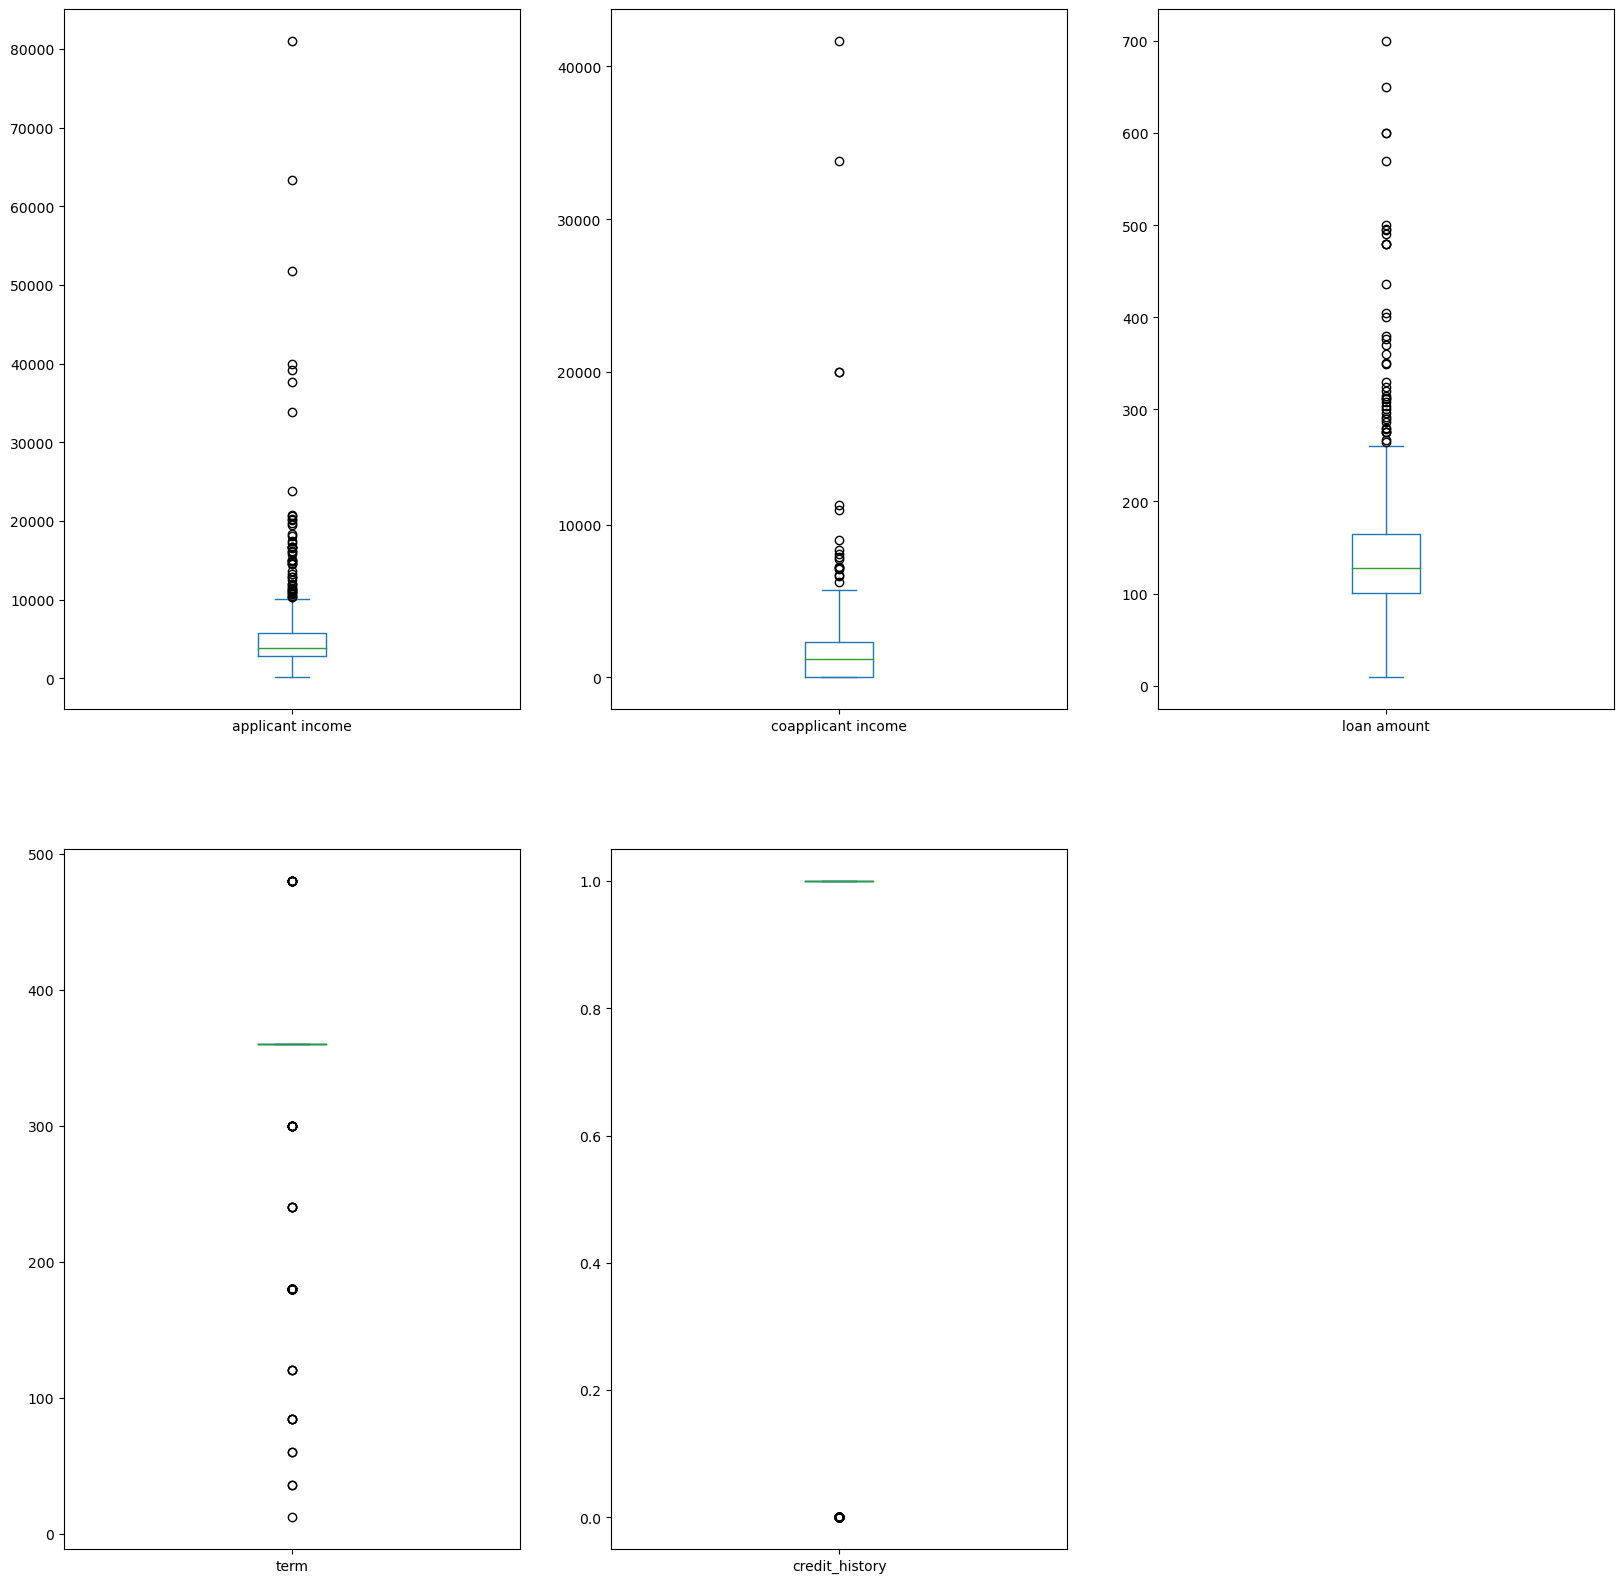

In [21]:
df[numerical_cols].plot(kind='box',subplots=True,layout=(2,3),figsize=(20,20))

In [22]:
df['credit_history'].value_counts()

credit_history
1.0    525
0.0     89
Name: count, dtype: int64

In [23]:
df['term'].value_counts()

term
360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [24]:
df['term']=df['term'].replace([84,120,60,26,12,36,300,240],180)

In [25]:
df['term']=df['term'].replace(480,360)

In [26]:
for i in ['applicant income','coapplicant income','loan amount']:
    IQR=df[i].quantile(0.75)-df[i].quantile(0.25)

    Q1=df[i].quantile(0.25)

    Q2=df[i].quantile(0.75)

    lowl=Q1-1.5*IQR
    print(lowl)
    upperl=Q2+1.5*IQR
    print(upperl)
    
    new_df=df[i].copy()
    
    new_df=np.where(new_df > upperl , upperl ,
                           np.where(new_df <lowl, lowl ,new_df
                                   )
                           )
    df[i]=new_df

-1498.75
10171.25
-3445.875
5743.125
3.5
261.5


applicant income         Axes(0.125,0.786098;0.133621x0.0939024)
coapplicant income    Axes(0.285345,0.786098;0.133621x0.0939024)
loan amount            Axes(0.44569,0.786098;0.133621x0.0939024)
term                  Axes(0.606034,0.786098;0.133621x0.0939024)
credit_history        Axes(0.766379,0.786098;0.133621x0.0939024)
dtype: object

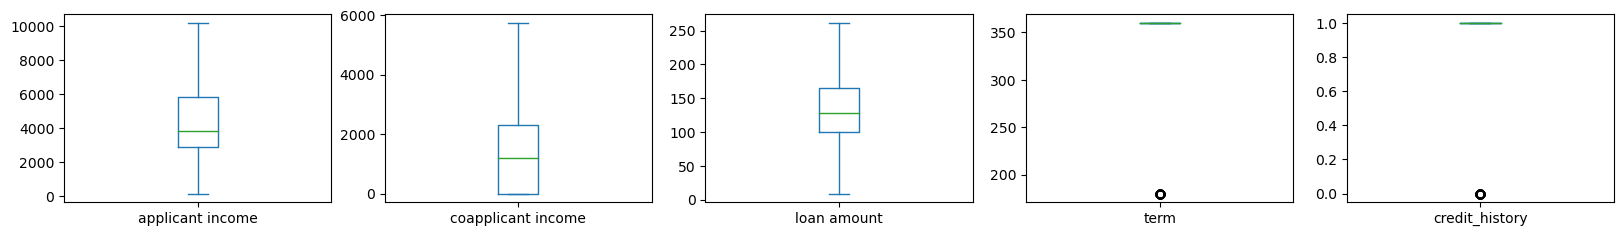

In [27]:
df[numerical_cols].plot(kind='box',subplots=True,layout=(7,5),figsize=(20,20))

So the outliers which are present in some of the features are also removed

***check for skewness***

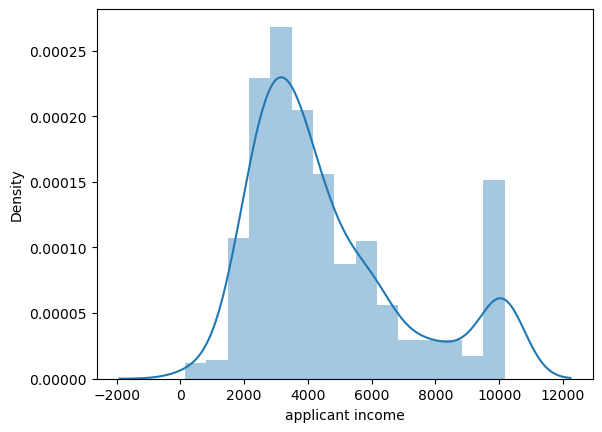

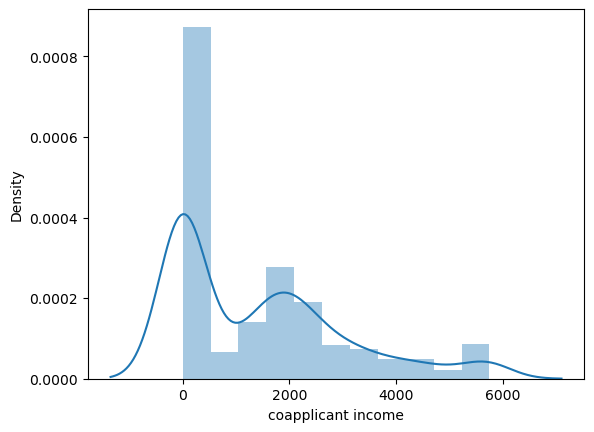

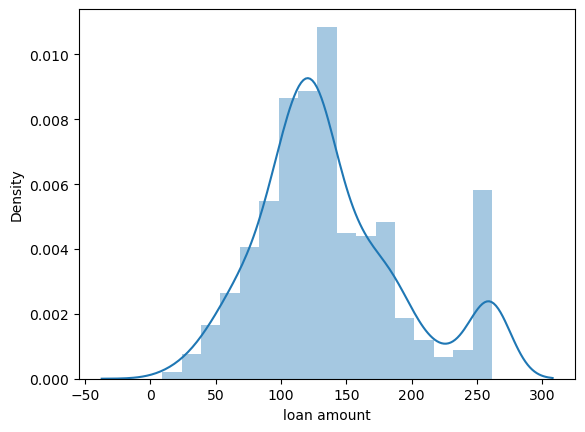

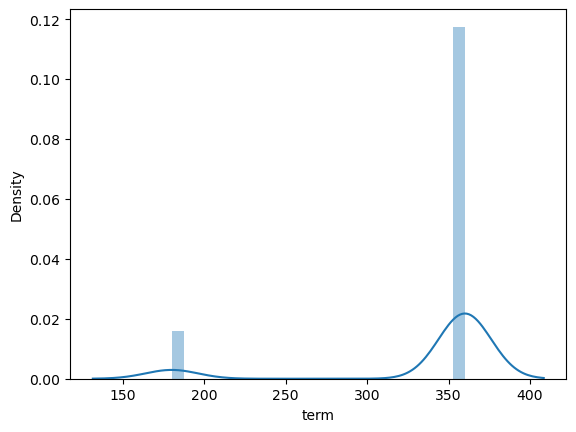

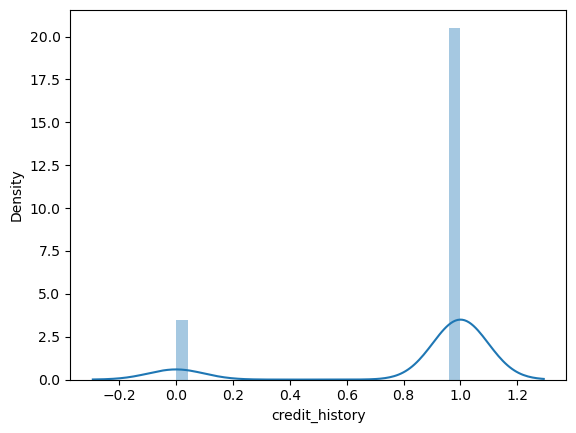

In [28]:
for i in numerical_cols:
    sns.distplot(df[i],kde=True)
    plt.show()

Transformation to get rid of skewness

In [29]:
for i in ['coapplicant income','term','credit_history']:
    df[i] = np.sqrt(df[i])

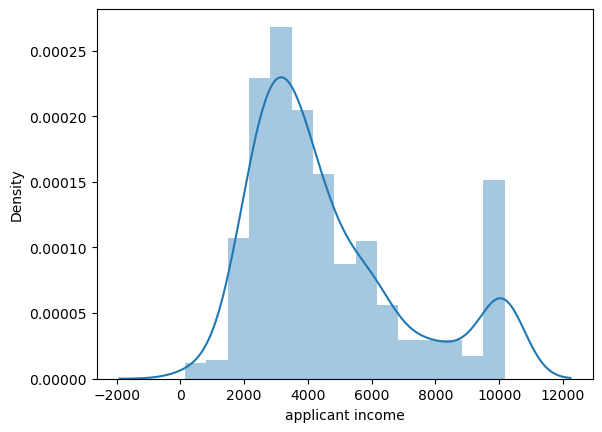

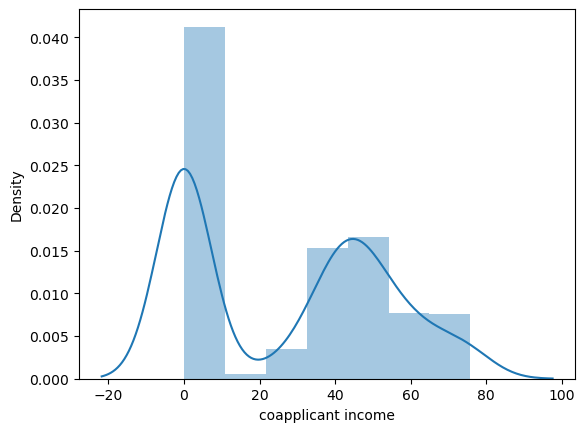

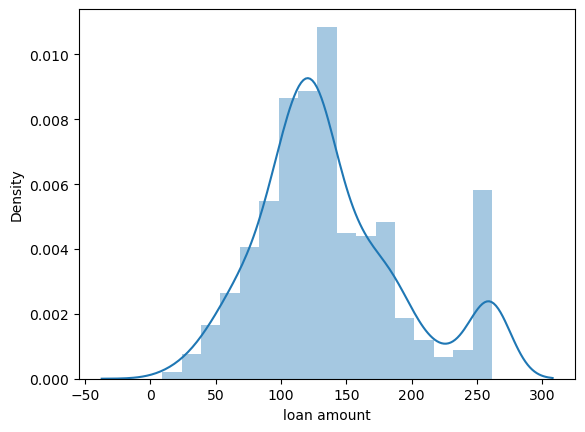

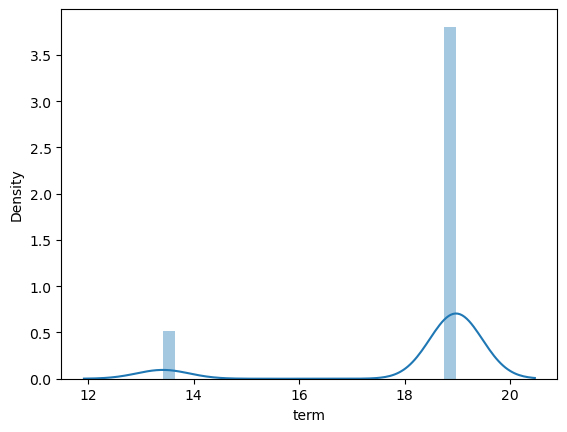

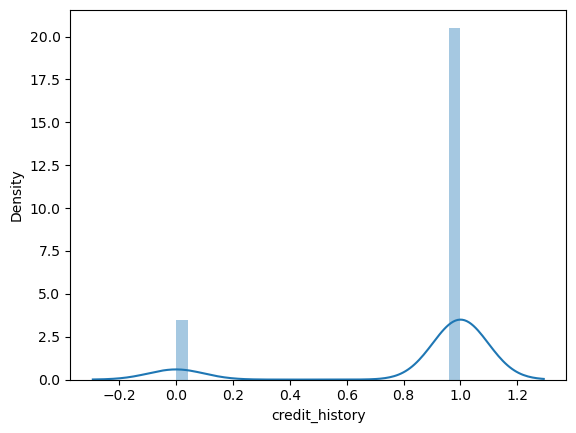

In [30]:
for i in numerical_cols:
    sns.distplot(df[i],kde=True)
    plt.show()

Skewness is managed

***Encoding of categorical column***

As the catrgorical data is nominal we can use nominal encoding

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le=LabelEncoder()

In [33]:
for i in df[categorical_cols]:
    df[i]=le.fit_transform(df[i])
df

,gender,married,dependents,education,self_employed,applicant income,coapplicant income,loan amount,term,credit_history,propety area,loan status
0,1,0,0,0,0,5849.0,0.000000,128.0,18.973666,1.0,2,1
1,1,1,1,0,0,4583.0,38.832976,128.0,18.973666,1.0,0,0
2,1,1,0,0,1,3000.0,0.000000,66.0,18.973666,1.0,2,1
3,1,1,0,1,0,2583.0,48.559242,120.0,18.973666,1.0,2,1
4,1,0,0,0,0,6000.0,0.000000,141.0,18.973666,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900.0,0.000000,71.0,18.973666,1.0,0,1
610,1,1,3,0,0,4106.0,0.000000,40.0,13.416408,1.0,0,1
611,1,1,1,0,0,8072.0,15.491933,253.0,18.973666,1.0,2,1
612,1,1,2,0,0,7583.0,0.000000,187.0,18.973666,1.0,2,1


***Check for Correlation between feautures***

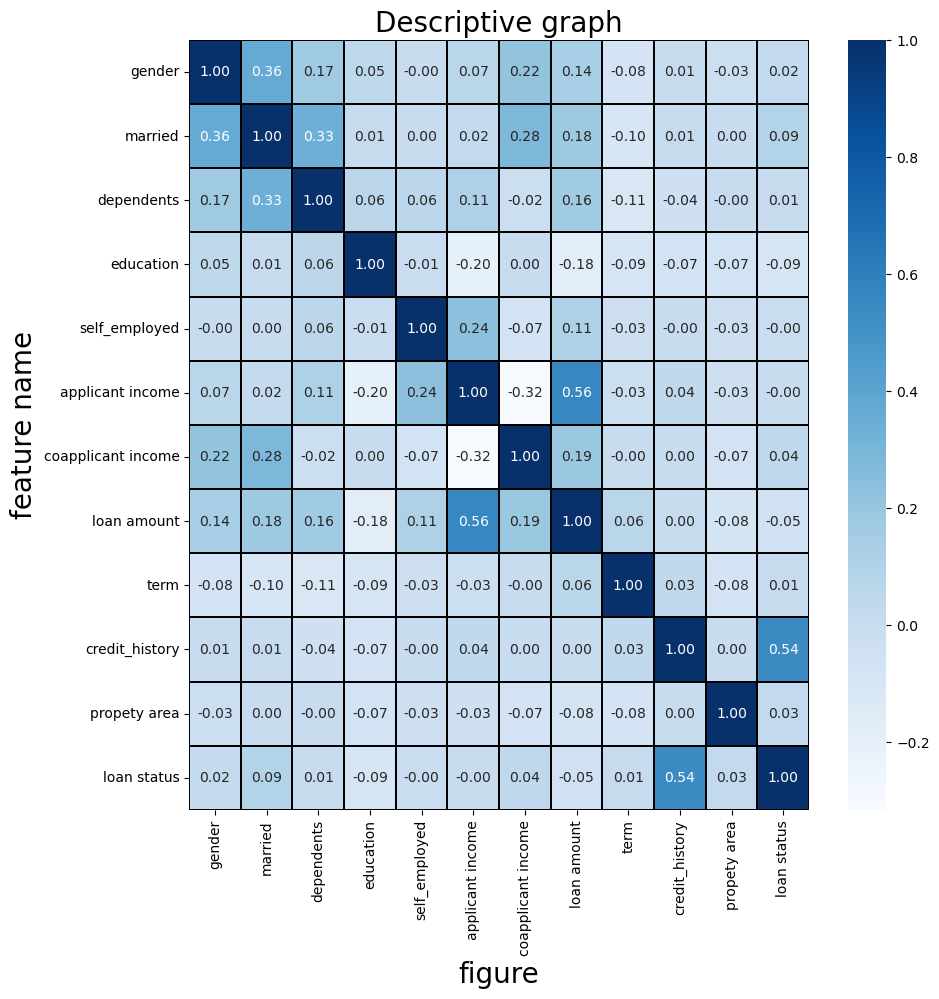

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Blues')
plt.xlabel('figure',fontsize=20)
plt.ylabel('feature name',fontsize=20)
plt.title('Descriptive graph',fontsize=20)
plt.show()

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor #importing of VIF 
def calc_vif(df):
    vif=pd.DataFrame()
    vif['Variables']=df.columns
    vif['VIF FACTOR']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return(vif)

In [36]:
calc_vif(df)

,Variables,VIF FACTOR
0,gender,6.424745
1,married,3.943581
2,dependents,1.829651
3,education,1.346603
4,self_employed,1.228941
5,applicant income,9.378012
6,coapplicant income,3.277005
7,loan amount,13.837261
8,term,16.939979
9,credit_history,9.620300


We can see most of the features are highly correlated with each other so some features must be dropped to prevent overfitting

In [37]:
df.drop(["term"],axis=1,inplace=True)

In [38]:
df.drop(["applicant income"],axis=1,inplace=True)

So correlation between features are rectified

***Checking of correlation with the target***

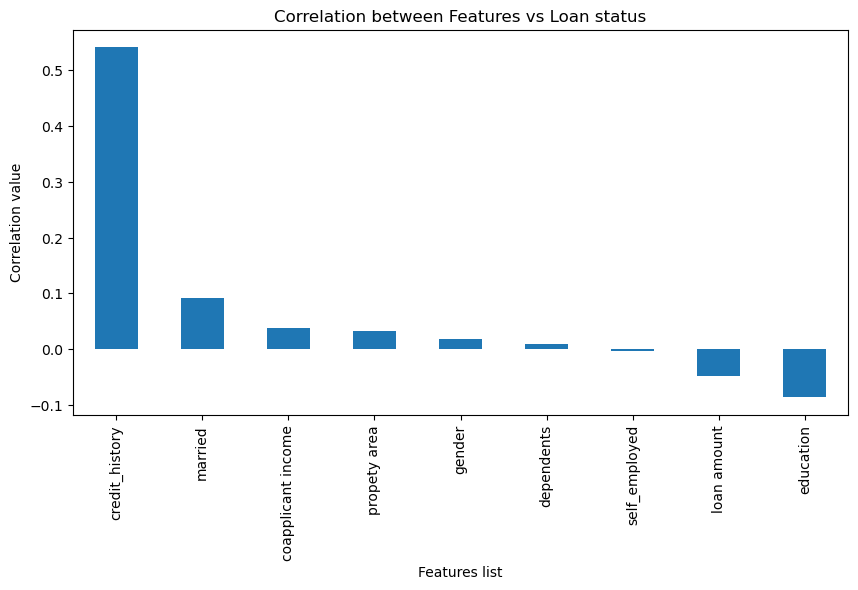

In [39]:
df_corr=df.corr()
plt.figure(figsize=(10,5))
df_corr['loan status'].sort_values(ascending=False).drop('loan status').plot.bar()
plt.title("Correlation between Features vs Loan status")
plt.xlabel('Features list')
plt.ylabel('Correlation value')
plt.show()

In [40]:
df.drop(['self_employed'],axis=1,inplace=True)

***Splitting of data into features and target***

In [41]:
x=df.drop('loan status',axis=1)
y=df['loan status']

In [42]:
x

,gender,married,dependents,education,coapplicant income,loan amount,credit_history,propety area
0,1,0,0,0,0.000000,128.0,1.0,2
1,1,1,1,0,38.832976,128.0,1.0,0
2,1,1,0,0,0.000000,66.0,1.0,2
3,1,1,0,1,48.559242,120.0,1.0,2
4,1,0,0,0,0.000000,141.0,1.0,2
...,...,...,...,...,...,...,...,...
609,0,0,0,0,0.000000,71.0,1.0,0
610,1,1,3,0,0.000000,40.0,1.0,0
611,1,1,1,0,15.491933,253.0,1.0,2
612,1,1,2,0,0.000000,187.0,1.0,2


***imbalance data converting into balance data***

loan status
1    422
0    192
Name: count, dtype: int64


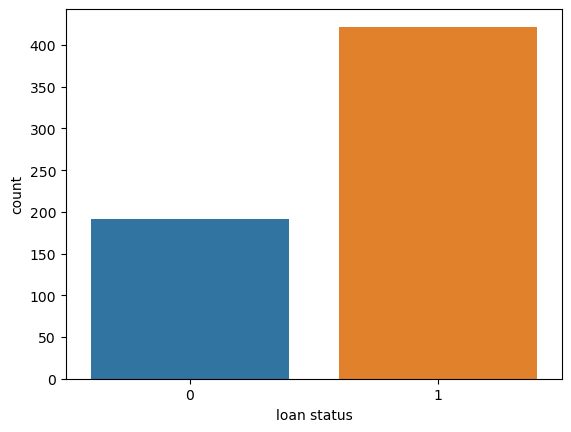

In [43]:
ax=sns.countplot(x='loan status',data=df)
print(df['loan status'].value_counts())

In [44]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [45]:
x,y=sm.fit_resample(x,y)

In [46]:
y.value_counts()

loan status
1    422
0    422
Name: count, dtype: int64

***Scaling or standardization of parameters***

In [47]:
scaler=StandardScaler()
X=scaler.fit_transform(x)
X

array([[ 0.54448781, -1.18803559, -0.70462137, ..., -0.20231892,
         0.55329129,  1.36427379],
       [ 0.54448781,  0.84172562,  0.34981203, ..., -0.20231892,
         0.55329129, -1.20879231],
       [ 0.54448781,  0.84172562, -0.70462137, ..., -1.29979046,
         0.55329129,  1.36427379],
       ...,
       [ 0.54448781, -1.18803559,  0.34981203, ..., -1.05197431,
        -1.62300603, -1.20879231],
       [-1.83658841, -1.18803559, -0.70462137, ..., -0.38656701,
        -1.02945059,  0.07774074],
       [ 0.54448781,  0.84172562,  0.34981203, ..., -0.2357308 ,
        -0.15976744, -1.20879231]])

***Find the best random score***

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV


In [49]:
lr=LogisticRegression()
maxAcc=0
rs=0
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    ac=accuracy_score(y_test,pred)
    if ac>maxAcc:
        maxAcc=ac
        rs=i
        
print("Best score ",maxAcc)
print("random state ",rs)

Best score  0.8388625592417062
random state  166


In [50]:
def classify(clf,X,y):
        x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=45)
        
        #train the model
        clf.fit(x_train,y_train)
        
        #predicting Ytest
        pred=clf.predict(x_test)
        
        #accuracy score
        acc_score=accuracy_score(y_test,pred)
        print("Accuracy score",acc_score)
        
        #confusion matrix
        print("Confusion matrix :\n",confusion_matrix(y_test,pred))
        
        #classification report
        print("Classification report :\n",classification_report(y_test,pred))
        
        #cross validation score
        cv_score=(cross_val_score(clf,x,y,cv=5).mean())
        print("cross validation score ",cv_score)
        
        #Result of accuracy minus cv scores
        result=acc_score-cv_score
        print("The final result of accuracy minus cross validation is ",result)

In [51]:
clf=LogisticRegression()
classify(clf,X,y)

Accuracy score 0.8341232227488151
Confusion matrix :
 [[ 69  27]
 [  8 107]]
Classification report :
               precision    recall  f1-score   support

           0       0.90      0.72      0.80        96
           1       0.80      0.93      0.86       115

    accuracy                           0.83       211
   macro avg       0.85      0.82      0.83       211
weighted avg       0.84      0.83      0.83       211

cross validation score  0.7440969287123134
The final result of accuracy minus cross validation is  0.09002629403650175


In [52]:
clf=DecisionTreeClassifier()
classify(clf,X,y)

Accuracy score 0.8246445497630331
Confusion matrix :
 [[79 17]
 [20 95]]
Classification report :
               precision    recall  f1-score   support

           0       0.80      0.82      0.81        96
           1       0.85      0.83      0.84       115

    accuracy                           0.82       211
   macro avg       0.82      0.82      0.82       211
weighted avg       0.83      0.82      0.82       211

cross validation score  0.7690053536207383
The final result of accuracy minus cross validation is  0.055639196142294844


In [53]:
clf=RandomForestClassifier()
classify(clf,X,y)

Accuracy score 0.8672985781990521
Confusion matrix :
 [[ 81  15]
 [ 13 102]]
Classification report :
               precision    recall  f1-score   support

           0       0.86      0.84      0.85        96
           1       0.87      0.89      0.88       115

    accuracy                           0.87       211
   macro avg       0.87      0.87      0.87       211
weighted avg       0.87      0.87      0.87       211

cross validation score  0.8069103972950128
The final result of accuracy minus cross validation is  0.0603881809040393


In [54]:
clf=AdaBoostClassifier()
classify(clf,X,y)

Accuracy score 0.8199052132701422
Confusion matrix :
 [[ 69  27]
 [ 11 104]]
Classification report :
               precision    recall  f1-score   support

           0       0.86      0.72      0.78        96
           1       0.79      0.90      0.85       115

    accuracy                           0.82       211
   macro avg       0.83      0.81      0.81       211
weighted avg       0.83      0.82      0.82       211

cross validation score  0.7689842209072979
The final result of accuracy minus cross validation is  0.05092099236284431


In [55]:
clf=GradientBoostingClassifier()
classify(clf,X,y)

Accuracy score 0.8625592417061612
Confusion matrix :
 [[ 76  20]
 [  9 106]]
Classification report :
               precision    recall  f1-score   support

           0       0.89      0.79      0.84        96
           1       0.84      0.92      0.88       115

    accuracy                           0.86       211
   macro avg       0.87      0.86      0.86       211
weighted avg       0.87      0.86      0.86       211

cross validation score  0.7962947309101156
The final result of accuracy minus cross validation is  0.06626451079604556


In [56]:
clf=KNeighborsClassifier()
classify(clf,X,y)

Accuracy score 0.7298578199052133
Confusion matrix :
 [[64 32]
 [25 90]]
Classification report :
               precision    recall  f1-score   support

           0       0.72      0.67      0.69        96
           1       0.74      0.78      0.76       115

    accuracy                           0.73       211
   macro avg       0.73      0.72      0.73       211
weighted avg       0.73      0.73      0.73       211

cross validation score  0.6611439842209073
The final result of accuracy minus cross validation is  0.068713835684306


In [57]:
clf=SVC()
classify(clf,X,y)

Accuracy score 0.7962085308056872
Confusion matrix :
 [[ 62  34]
 [  9 106]]
Classification report :
               precision    recall  f1-score   support

           0       0.87      0.65      0.74        96
           1       0.76      0.92      0.83       115

    accuracy                           0.80       211
   macro avg       0.82      0.78      0.79       211
weighted avg       0.81      0.80      0.79       211

cross validation score  0.5473443223443224
The final result of accuracy minus cross validation is  0.2488642084613648


According to our requirements we have to check whose recall is better with better accuracy score for 1.

So out of the above models the AdaBoost classifier gives the best results,the recall value is high for this model the hyperparamter tuning is done.

***Hyperparameter tuning***

In [58]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=45)
model = AdaBoostClassifier()

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [50,150,100],
    'learning_rate': [0.01, 0.1, 1],
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Fit grid search to the data
grid_search.fit(x_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score (accuracy):", grid_search.best_score_)

Best parameters: {'learning_rate': 0.1, 'n_estimators': 150}
Best score (accuracy): 0.7646544181977253


In [59]:
best_model=AdaBoostClassifier()
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=45)
best_model.fit(x_train,y_train)
pred=best_model.predict(x_test)
acc_score=accuracy_score(y_test,pred)
print("Accuracy score",acc_score)
print("Confusion matrix :\n",confusion_matrix(y_test,pred))
print("Classification report :\n",classification_report(y_test,pred))

Accuracy score 0.8199052132701422
Confusion matrix :
 [[ 69  27]
 [ 11 104]]
Classification report :
               precision    recall  f1-score   support

           0       0.86      0.72      0.78        96
           1       0.79      0.90      0.85       115

    accuracy                           0.82       211
   macro avg       0.83      0.81      0.81       211
weighted avg       0.83      0.82      0.82       211



In [60]:
from sklearn.metrics import roc_auc_score

In [61]:
y_pred_prob=best_model.predict_proba(x_test)[:,1]

In [62]:
y_pred_prob

array([0.50117542, 0.51156042, 0.50691635, 0.48386619, 0.47526887,
       0.4727638 , 0.5075584 , 0.50161072, 0.50158744, 0.50654055,
       0.50989415, 0.47164493, 0.49645407, 0.48084791, 0.50368745,
       0.50489674, 0.48208462, 0.50204991, 0.50584721, 0.49985296,
       0.50456487, 0.50795109, 0.50204991, 0.47636516, 0.5007329 ,
       0.50120853, 0.50795109, 0.52743696, 0.50656044, 0.50346608,
       0.47116476, 0.50316177, 0.501226  , 0.48454017, 0.49645407,
       0.48085919, 0.50685002, 0.50184956, 0.47718429, 0.49281144,
       0.49956208, 0.50256725, 0.50233095, 0.51047012, 0.48679591,
       0.50795109, 0.50060646, 0.50656733, 0.47123199, 0.50732521,
       0.50544507, 0.50428995, 0.50378129, 0.5103913 , 0.50584721,
       0.50169372, 0.4830589 , 0.501226  , 0.51006409, 0.49920471,
       0.49941765, 0.49754081, 0.50660119, 0.50795109, 0.50159433,
       0.50418345, 0.4815867 , 0.50954908, 0.48659571, 0.50032714,
       0.50232485, 0.50857987, 0.50487684, 0.47166589, 0.49951

In [63]:
from sklearn.metrics import roc_curve

In [64]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

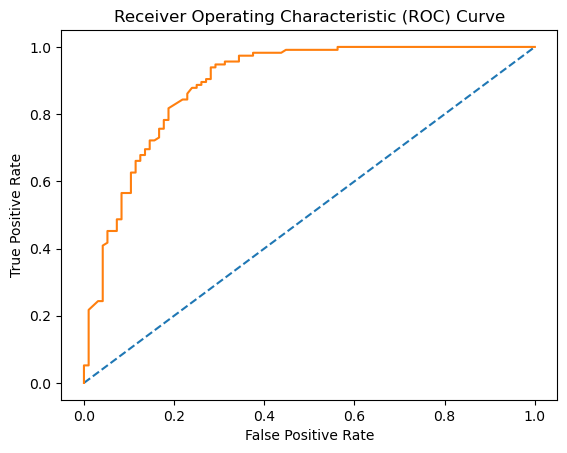

In [65]:
plt.plot([0, 1], [0, 1],linestyle='--')
plt.plot(fpr,tpr,label="AdaBoostClassifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

So the curve is nice ...It is performing well

In [66]:
import joblib

joblib.dump(best_model, 'loan_status.joblib')

['loan_status.joblib']

In [67]:
x

,gender,married,dependents,education,coapplicant income,loan amount,credit_history,propety area
0,1,0,0,0,0.000000,128.000000,1.000000,2
1,1,1,1,0,38.832976,128.000000,1.000000,0
2,1,1,0,0,0.000000,66.000000,1.000000,2
3,1,1,0,1,48.559242,120.000000,1.000000,2
4,1,0,0,0,0.000000,141.000000,1.000000,2
...,...,...,...,...,...,...,...,...
839,1,0,0,1,45.742490,124.969988,0.000000,1
840,1,1,0,0,0.000000,261.141979,1.000000,1
841,1,0,1,0,0.000000,80.000000,0.177011,0
842,0,0,0,0,56.499691,117.591182,0.401470,1


In [68]:
loaded_model = joblib.load('loan_status.joblib')

In [70]:
t=np.array([1,1,1,0,15.491933,253.0,1.0,2])
t=t.reshape(1,-1)
loaded_model.predict(t) 

array([1])

In [71]:
df

,gender,married,dependents,education,coapplicant income,loan amount,credit_history,propety area,loan status
0,1,0,0,0,0.000000,128.0,1.0,2,1
1,1,1,1,0,38.832976,128.0,1.0,0,0
2,1,1,0,0,0.000000,66.0,1.0,2,1
3,1,1,0,1,48.559242,120.0,1.0,2,1
4,1,0,0,0,0.000000,141.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0.000000,71.0,1.0,0,1
610,1,1,3,0,0.000000,40.0,1.0,0,1
611,1,1,1,0,15.491933,253.0,1.0,2,1
612,1,1,2,0,0.000000,187.0,1.0,2,1


You can see the model is giving the perfect result.